In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#

### 1) Obtaining Data

In [2]:
# https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement
# The % (Secondary Education %, Higher Secondary Education %, MBA %) are the % on the final exam

df = pd.read_csv('Placement_Data_Full_Class.csv')

df = df.drop(columns=['sl_no']) # This is just an ID column
df.columns = ['gender', 'secondary education %', 'secondary board of education', 'higher secondary education %', 'higher board of education', 'specialization in higher secondary education', 'degree %', 'undergrad field', 'work experience', 'employability test %', 'mba specialization', 'mba %', 'status', 'salary']

df.head()

gender  secondary education % secondary board of education  \
0      M                  67.00                       Others   
1      M                  79.33                      Central   
2      M                  65.00                      Central   
3      M                  56.00                      Central   
4      M                  85.80                      Central   

   higher secondary education % higher board of education  \
0                         91.00                    Others   
1                         78.33                    Others   
2                         68.00                   Central   
3                         52.00                   Central   
4                         73.60                   Central   

  specialization in higher secondary education  degree % undergrad field  \
0                                     Commerce     58.00        Sci&Tech   
1                                      Science     77.48        Sci&Tech   
2                                         Arts     64.00       Comm&Mgmt   
3                                      Science     52.00        Sci&Tech   
4                                     Commerce     73.30       Comm&Mgmt   

  work experience  employability test % mba specialization  mba %      status  \
0              No                  55.0             Mkt&HR  58.80      Placed   
1             Yes                  86.5            Mkt&Fin  66.28      Placed   
2              No                  75.0            Mkt&Fin  57.80      Placed   
3              No                  66.0             Mkt&HR  59.43  Not Placed   
4              No                  96.8            Mkt&Fin  55.50      Placed   

     salary  
0  270000.0  
1  200000.0  
2  250000.0  
3       NaN  
4  425000.0

#

### 2) Missing Data

<AxesSubplot:>

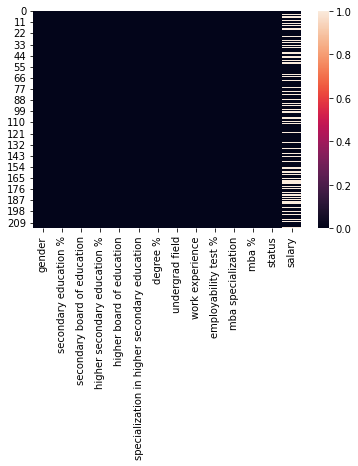

In [3]:
sns.heatmap(df.isna())

In [4]:
print(f"Rows with null:\t {df.isna().sum().max()}")

noSal_noPlace = len(df[(df['salary'].isna()) & (df['status'] == "Not Placed")])
noSal_Place = len(df[(df['salary'].isna()) & (df['status'] == "Placed")])

print(f"No Salary & Did Not Place: {noSal_noPlace}")
print(f"No Salary & Did Placed: {noSal_Place}")

Rows with null:	 67
No Salary & Did Not Place: 67
No Salary & Did Placed: 0


#### It seems those that did not place have NaN salary, which is correct. I'll turn NaN to 0 in this case.

<AxesSubplot:>

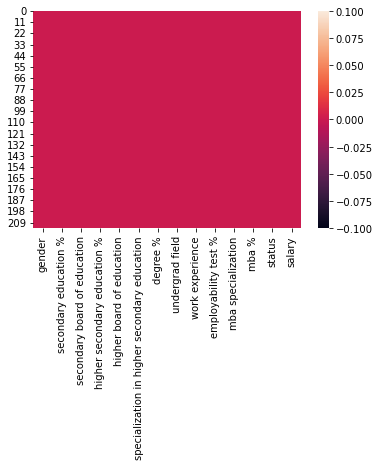

In [5]:
df = df.fillna(0)
sns.heatmap(df.isna())

#

### 4) Graphing (Make at least your final graph an interactive graph)

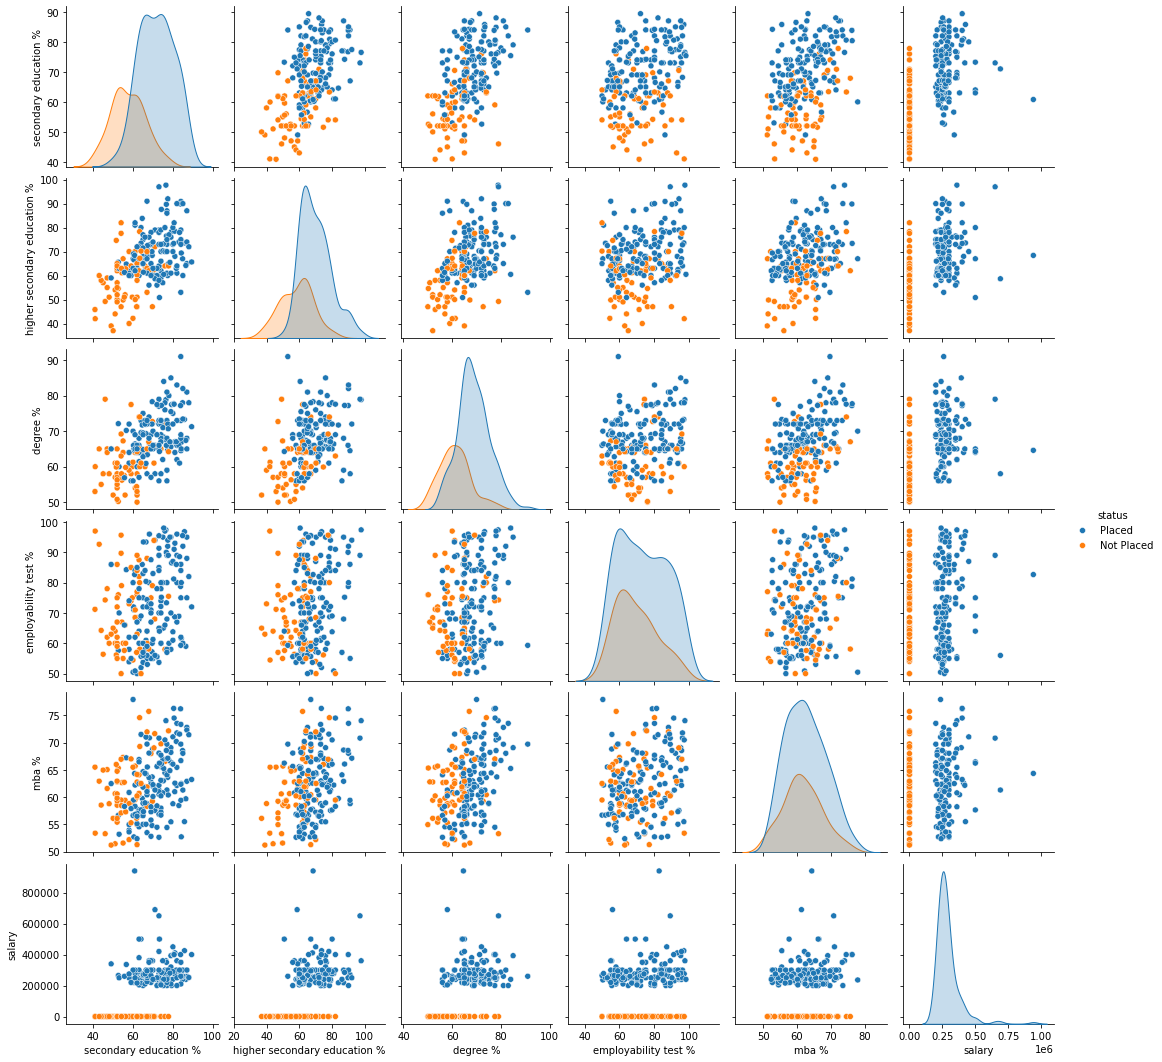

In [6]:
sns.pairplot(df, hue='status')

/tmp/ipykernel_16556/1793843373.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['status'].replace(['Placed', 'Not Placed'],[0, 1], inplace=True)


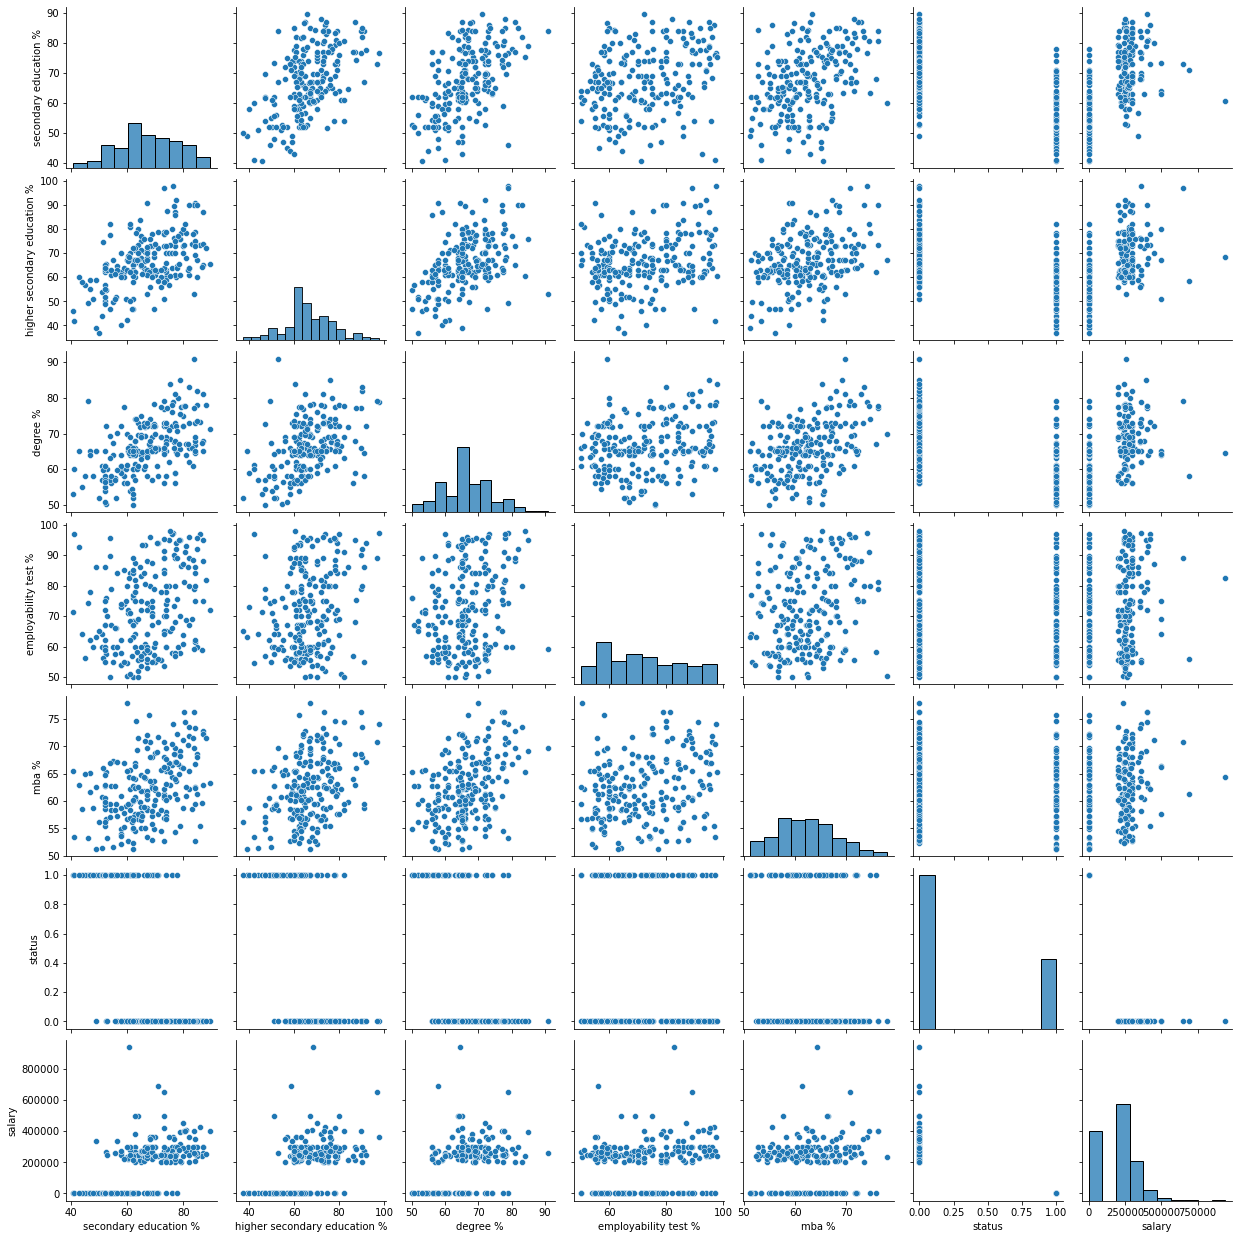

In [7]:
df['status'].replace(['Placed', 'Not Placed'],[0, 1], inplace=True)
sns.pairplot(df)

In [8]:
cats = df.drop(columns=['gender', 'secondary board of education', 'higher board of education', 'specialization in higher secondary education', 'undergrad field', 'work experience', 'mba specialization', 'status'])

a = cats[cats['salary'].isna() == False]
corr = cats.corr().replace(1, 0)
corr

secondary education %  \
secondary education %                      0.000000   
higher secondary education %               0.511472   
degree %                                   0.538404   
employability test %                       0.261993   
mba %                                      0.388478   
salary                                     0.538090   

                              higher secondary education %  degree %  \
secondary education %                             0.511472  0.538404   
higher secondary education %                      0.000000  0.434206   
degree %                                          0.434206  0.000000   
employability test %                              0.245113  0.224470   
mba %                                             0.354823  0.402364   
salary                                            0.452569  0.408371   

                              employability test %     mba %    salary  
secondary education %                     0.261993  0.388478  0.538090  
higher secondary education %              0.245113  0.354823  0.452569  
degree %                                  0.224470  0.402364  0.408371  
employability test %                      0.000000  0.218055  0.186988  
mba %                                     0.218055  0.000000  0.139823  
salary                                    0.186988  0.139823  0.000000

### Top 5 correlations: 
 1) secondary education % & mba %
 2) higher secondary education % & mba %
 3) secondary education % & degree %
 4) employability test % & secondary education %
 5) employability test % & mba %

<AxesSubplot:xlabel='gender', ylabel='count'>

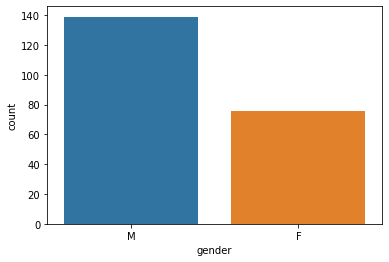

In [9]:
sns.countplot(df, x='gender', hue='gender')

Text(0.5, 1.0, 'Salary vs Work Experience')

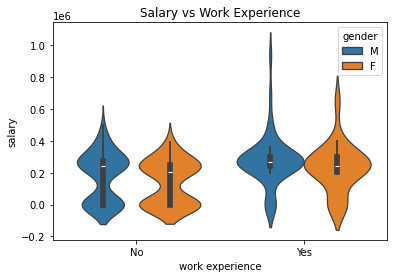

In [10]:
sns.violinplot(data=df, x="work experience", y="salary", hue="gender").set_title("Salary vs Work Experience")

Text(0.5, 1.0, 'Employability Test % vs Work Experience')

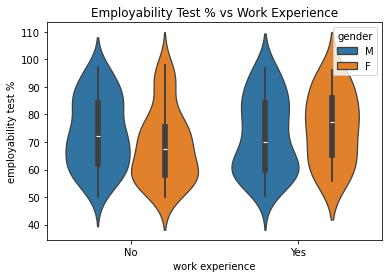

In [11]:
sns.violinplot(data=df, x="work experience", y="employability test %", hue="gender").set_title("Employability Test % vs Work Experience")

Text(0.5, 1.0, 'Higher Secondary Education % vs Secondary Board of Education Location')

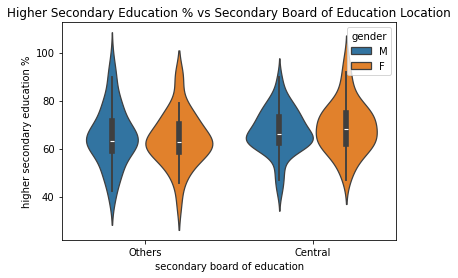

In [12]:
sns.violinplot(df, x='secondary board of education', y='higher secondary education %', hue='gender').set_title("Higher Secondary Education % vs Secondary Board of Education Location")

Text(0.5, 1.0, 'Degree % vs Higher Board of Education Location')

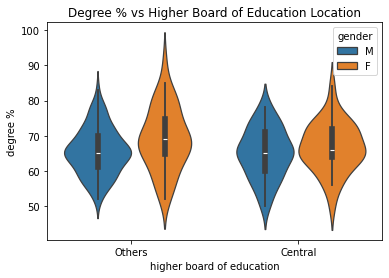

In [13]:
sns.violinplot(df, x='higher board of education', y='degree %', hue='gender').set_title("Degree % vs Higher Board of Education Location")

Text(0.5, 1.0, 'Undergrad Field Count')

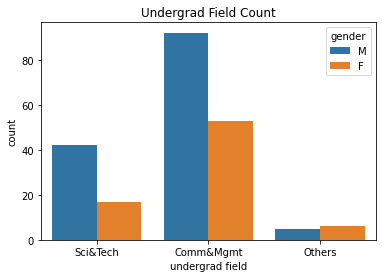

In [14]:
sns.countplot(df, x='undergrad field', hue='gender').set_title("Undergrad Field Count")

Text(0.5, 1.0, 'MBA Specialization Count')

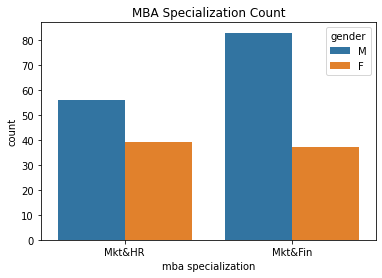

In [15]:
sns.countplot(df, x='mba specialization', hue='gender').set_title("MBA Specialization Count")

Text(0.5, 1.0, 'Gender Count')

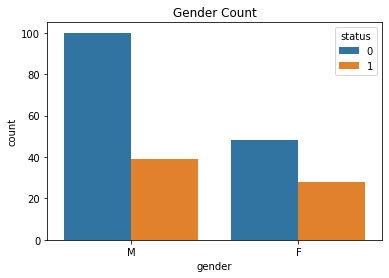

In [16]:
sns.countplot(df, x='gender', hue='status').set_title("Gender Count")

In [17]:
fig = px.scatter(df, x="employability test %", y="higher secondary education %", color="status", title="Higher Secondary Education % vs Employability Test %")
fig.show()

#

### Discuss a few questions we can answer using this data and choose one

In [18]:
# Options:
# 1) Does a higher degree % typically mean a higher employability rate %?
# 2) Given I am an average Joe (mean secondary degree %, mean employability test %), should I expect to get hired?
# 3) Given I have a very low employability test % and a very high secondary degree %, should I expect to get hired?
# 4) Do you need a high degree % to get placed?

1) Create class
2) Load X (pred), Y (actual)
3) Split XY pairs 70-20-10 (train-test-validation)
4) Initial linear regression
5) Logistic regression (alpha, iters)
6) Predict (X), return Y and Y_Actual

#### This is the graph I want to focus on

Text(0.5, 1.0, 'Status vs Degree %')

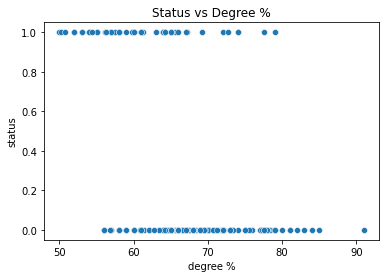

In [19]:
sns.scatterplot(df, x='degree %', y='status').set_title("Status vs Degree %")

In [20]:
class LogisticRegression():
    def __init__(self, alpha, iters): # (self, learning_rate, number_of_iterations)
        self.alpha = alpha
        self.iters = iters
        
    def fit(self, X, Y): # (self, pred, actual)
        self.X = X
        self.y = Y
        self.m = X.shape[0]
        
        X_bar = self.X - self.X.mean()
        Y_bar = self.y - self.y.mean()
        
        self.b1 = X_bar.dot(Y_bar) / X_bar.dot(X_bar)
        self.b0 = self.y.mean() - self.b1 * self.X.mean()
        
        for i in range(self.iters):
            self.descend()
            
    def descend(self):
        # p_hat = 1 / (1 + e^-x)
        # b0 = b0 - alpha * db0
        # b1 = b1 - alpha * db1
        
        # db0 = (1/m) * sum(p_hat - y)
        # db1 = (1/m) * [p_hat - y] * X
        
        p_hat = 1 / (1 + np.exp(-(self.b0 + self.b1 * self.X)))
        
        db0 = (1/self.m) * np.sum(p_hat - self.y)        
        db1 = (1/self.m) * (p_hat - self.y).dot(self.X)
        
        self.b0 -= self.alpha * db0
        self.b1 -= self.alpha * db1
        
    def predict(self, a):
        y_prob = 1 / (1 + np.exp(-(self.b0 + self.b1 * a))) # p_hat
        y_pred = np.where( y_prob > 0.5, 1, 0)
        return (y_prob, y_pred)

In [21]:
def train_test_validation_split(df):
    mask = np.random.rand(len(df))

    train = df[mask < 0.7]
    test = df[(mask >= 0.7) & (mask < 0.9)]
    validation = df[mask >= 0.9]

    print(f'train: {len(train)/len(df)*100}%')
    print(f'test: {len(test)/len(df)*100}%')
    print(f'validation: {len(validation)/len(df)*100}%')
    
    return train, test, validation

In [22]:
## First, we need to scale the data
d = df[['degree %', 'status']]
d['degree %'] = (d['degree %'] - d['degree %'].min()) / (d['degree %'].max()-d['degree %'].min())

# Then split the data
train, test, validation = train_test_validation_split(d)

train: 71.62790697674419%
test: 19.069767441860467%
validation: 9.30232558139535%


/tmp/ipykernel_16556/1839608350.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Fit the training data to a logistic curve
l = LogisticRegression(0.01, 1000)
l.fit(train['degree %'], train['status'])

# Make a prediction with the test data
y_prob, y_pred = l.predict(test['degree %'])

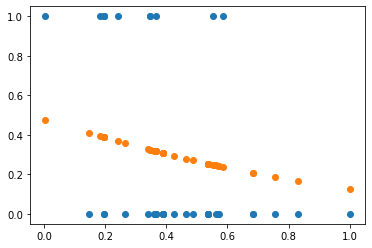

In [24]:
plt.scatter(test['degree %'], test['status'])
plt.scatter(test['degree %'], y_prob)

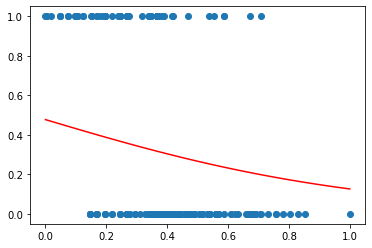

In [25]:
# Create a linear space of 100 points we can graph for the logistic curve
linspace = np.linspace(0, 1, 100)
linspace = (linspace - d['degree %'].min()) / (d['degree %'].max()-d['degree %'].min())
l_prob, l_pred = l.predict(linspace)

# Print our total data and the logistic curve
plt.scatter(d['degree %'], d['status'])
plt.plot(linspace, l_prob, c='r')

In [35]:
l.predict(0.5)

(0.26650582313678095, array(0))